# IN_SYS - SW06 - Multiple Linear Regression - California Housing Data
### 30/10/2025 - Eugen Rodel - v2

### Goals: 
- Deepen understanding of Multiple Linear Regression using California Housing Data
- Repeat old topics as importing data from CSV file into Pandas, exploring and visualization of data, train model, make predictions

# 1. California Housing Dataset Explanation

The **California_Housing.csv** dataset contains information about housing features in California, such as median income, number of rooms, and house prices. Below is a description of each column in the dataset:

1. **Median Income**:
   - Median income of households in the area, measured in tens of thousands of USD.
   - This feature is an indicator of the economic status of the neighborhood.

2. **Age of House**:
   - Age of the house in years.
   - Represents the average age of houses in the neighborhood.

3. **Average Rooms**:
   - Average number of rooms per household in the area.
   - Includes all rooms such as bedrooms, living rooms, kitchens, etc.

4. **Average Bedrooms**:
   - Average number of bedrooms per household in the area.
   - Represents the number of bedrooms available in homes, on average.

5. **Population**:
   - Total population of the area.
   - Indicates the number of people residing in the neighborhood.

6. **Average Occupancy**:
   - Average occupancy per household in the area.
   - Represents how many people live in each household, on average.

7. **Latitude**:
   - Latitude of the location.
   - Represents the geographic coordinate for the neighborhood.

8. **Longitude**:
   - Longitude of the location.
   - Represents the geographic coordinate for the neighborhood.

9. **Price**:
   - Price of the house in hundreds of thousands of USD.
   - This is the **dependent variable** that we are trying to predict in our regression model. It represents the average housing price for the neighborhood.

The goal of this dataset is to predict the **Price** based on various features related to the property and the surrounding area. This dataset provides a practical use case for understanding how different factors, such as house size, age, and income, impact housing prices.


# 2. Import libraries

Hint: no new libraries are needed, just what we used in the lecture for the advertising Multiple Linear Regression.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set Seaborn style for plots
sns.set_style('whitegrid')

# 3. Load the Dataset

In [2]:
# Load the 'California_Housing.csv' file into a Pandas DataFrame called 'housing_df'
#housing_df = pd.read_csv('California_Housing.csv')
housing_df = pd.read_csv('California_Housing.csv')

# Display the first few rows of the DataFrame to verify that the import worked
housing_df.head()

,Median Income,Age of House,Average Rooms,Average Bedrooms,Population,Average Occupancy,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 4. Data Exploration and Visualization

In [3]:
# Display shape of the DataFrame
housing_df.shape

(20640, 9)

In [4]:
# Display column names
housing_df.columns

Index(['Median Income', 'Age of House', 'Average Rooms', 'Average Bedrooms',
       'Population', 'Average Occupancy', 'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [5]:
# Display summary statistics
housing_df.describe()

,Median Income,Age of House,Average Rooms,Average Bedrooms,Population,Average Occupancy,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


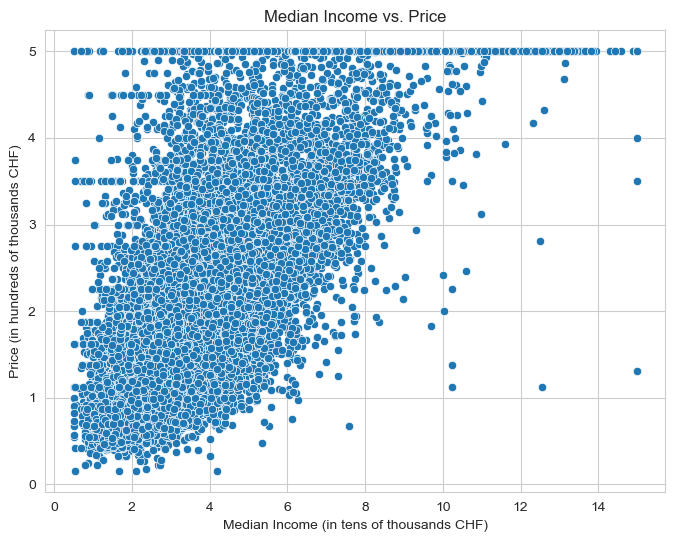

In [6]:
# Scatter plot of Median Income vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_df, x='Median Income', y='Price', marker='o')
plt.title('Median Income vs. Price')
plt.xlabel('Median Income (in tens of thousands CHF)')
plt.ylabel('Price (in hundreds of thousands CHF)')
plt.show()

# 5. Data "Cutting"
In the preceding scatter plot, we can see that the data has not been cleaned (e.g. where the price is constant and independent of income).
A quick and dirty solution is to only use data where the price is < 3.

In [7]:
# copy the data
housing_cut_df = housing_df.copy()

# filter the data
housing_cut_df = housing_cut_df[housing_cut_df['Price'] < 3]

In [8]:
# describe data
housing_cut_df.describe()

,Median Income,Age of House,Average Rooms,Average Bedrooms,Population,Average Occupancy,Latitude,Longitude,Price
count,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000
mean,3.383996,27.979790,5.263933,1.101897,1457.075176,3.153908,35.686326,-119.509070,1.615445
std,1.312453,12.307397,2.329034,0.477026,1148.226896,10.844691,2.192250,1.999295,0.651405
min,0.499900,1.000000,0.846154,0.333333,5.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.392900,18.000000,4.370574,1.006734,804.000000,2.495238,33.930000,-121.500000,1.082250
50%,3.221600,28.000000,5.103504,1.050108,1196.000000,2.894931,34.280000,-118.500000,1.585000
75%,4.208100,36.000000,5.821055,1.102007,1771.000000,3.374514,37.750000,-117.960000,2.126000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,2.997000


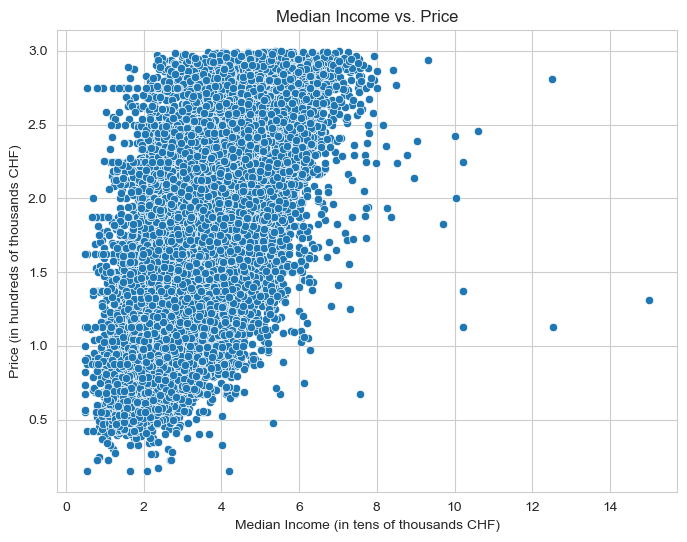

In [9]:
# Scatter plot of Median Income vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_cut_df, x='Median Income', y='Price', marker='o')
plt.title('Median Income vs. Price')
plt.xlabel('Median Income (in tens of thousands CHF)')
plt.ylabel('Price (in hundreds of thousands CHF)')
plt.show()

Text(0, 0.5, 'Price')

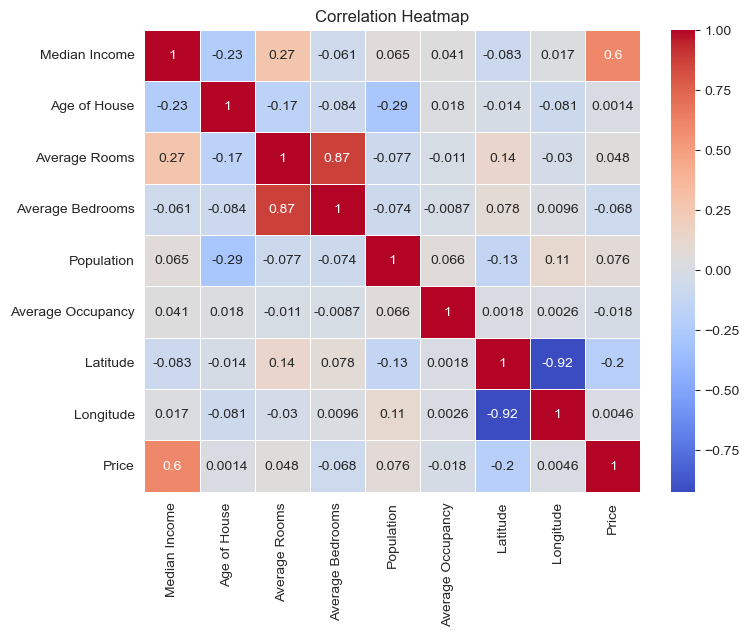

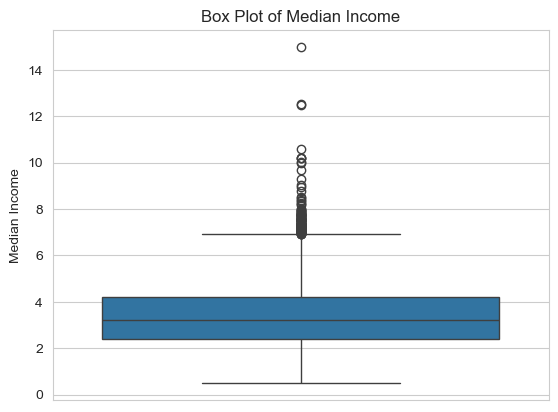

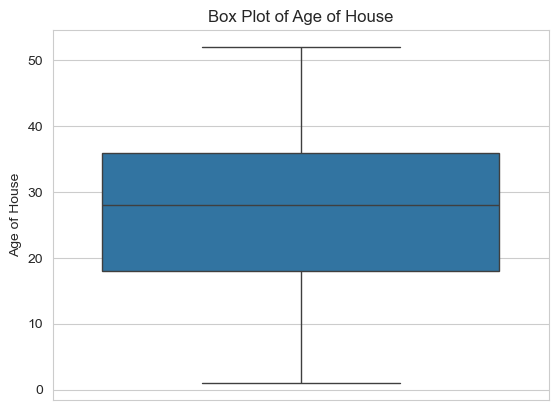

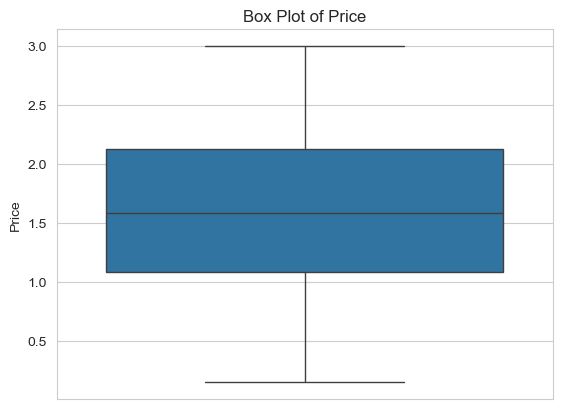

In [10]:
# Create a heatmap to show correlations between features
plt.figure(figsize=(8, 6))   # Set the plot size in inch: figsize(width, height)
sns.heatmap(housing_cut_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Box plot for "Median Income"
plt.figure()
sns.boxplot(data=housing_cut_df, y='Median Income')
plt.title('Box Plot of Median Income')
plt.ylabel('Median Income')

# Box plot for "Age of House"
plt.figure()
sns.boxplot(data=housing_cut_df, y='Age of House')
plt.title('Box Plot of Age of House')
plt.ylabel('Age of House')

# Box plot for "Price"
plt.figure()
sns.boxplot(data=housing_cut_df, y='Price')
plt.title('Box Plot of Price')
plt.ylabel('Price')


# 6. Prepare the Data for Modeling

In [11]:
# Define independent input features (X) and dependend output target - the sales price (y)
X = housing_cut_df[['Median Income', 'Age of House', 'Average Rooms', 'Average Bedrooms', 'Population', 'Average Occupancy', 'Latitude', 'Longitude']]
y = housing_cut_df['Price']

In [12]:
# Split the data into training and testing sets (80% training, 20% testing), with value for random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the Multiple Linear Regression Model

In [13]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 8. Get the intercept and the coefficients of the model

In [14]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -26.27626898612006
Coefficients: [ 3.03026185e-01  2.19061719e-03 -5.79309274e-02  3.23577722e-01
  1.66894340e-05 -2.33109315e-03 -3.05992790e-01 -3.15074964e-01]


# 9. Make Predictions using the test data

In [15]:
# Make predictions on the test set
# Make predictions on the test set
y_pred = model.predict(X_test)

# 9. Compare Predictions with Actual Values

In [16]:
# Create a DataFrame including the test data, and "Actual Price" and "Predicted Price" to compare actual and predicted prices
# name the new created DataFrame "results_df"

# Create a DataFrame from X_test
results_df = X_test.copy()

# Add the actual price values to the new DataFrame results_df into a new column called "Actual Price"
results_df['Actual Price'] = y_test

# Add the predicted price values to the new DataFrame results_df into a new column called "Predicted Price"
results_df['Predicted Price'] = y_pred

# sort results (and display data frame)
results_df.sort_index()



,Median Income,Age of House,Average Rooms,Average Bedrooms,Population,Average Occupancy,Latitude,Longitude,Actual Price,Predicted Price
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.080153
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,1.516737
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,1.913,1.714716
19,2.6033,52.0,5.465455,1.083636,690.0,2.509091,37.84,-122.27,1.629,1.611648
24,2.6000,52.0,5.270142,1.035545,1006.0,2.383886,37.84,-122.27,1.326,1.611967
...,...,...,...,...,...,...,...,...,...,...
20616,2.0469,15.0,4.826667,1.176000,1157.0,3.085333,39.08,-121.53,0.551,0.822748
20617,3.3021,20.0,4.921053,0.956140,308.0,2.701754,39.06,-121.53,0.708,1.130295
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,1.120,1.069171
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.405707


# 10. Visualization of Actual vs Prodicted Values

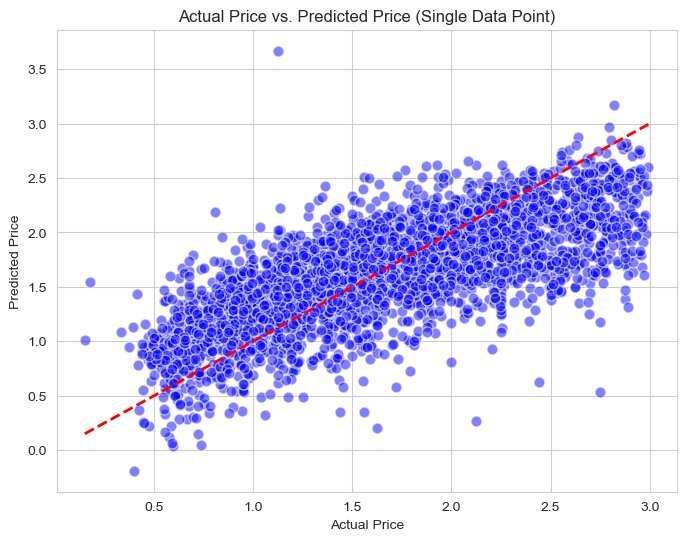

In [17]:
# Scatter plot: Actual Price vs. Predicted Price
plt.figure(figsize=(8, 6))
plt.scatter(data=results_df, x='Actual Price', y='Predicted Price', s=60, color='blue', edgecolors='white', alpha=0.5, marker='o')
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         [results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         color='red', linestyle='--', linewidth=2)  # 45-degree reference line
plt.title('Actual Price vs. Predicted Price (Single Data Point)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# 11. Model Evaluation

In [18]:
# Evaluate the model by calculating mse and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation results (mse and r2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.19
R² Score: 0.55
